In [106]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [108]:
#Read in HCI file for Parks Access
cahouseurl = 'https://github.com/crsalviati/CA_Housing/raw/master/Code/ca_house_initial_build.txt'
cahouse = pd.read_csv(cahouseurl, converters={'geotypevalue':str,'county_fips':str})
cahouse.head()

,Unnamed: 0,placefp,geoname,p_parkacc,pop2010,gini_index,median_hh_income,athome,bicycle,car,...,hh_m_child,hh_married,hh_married_child,hh_nonfam,hh_nonfam_solo,placename,county,regionid,zri_sqft,hval_sqft
0,0,212,Acton CDP,0.403765,7596.0,0.378,90888.0,6.4,0.000000,78.4,...,0.0,73.6,31.5,18.2,13.4,Acton,Los Angeles,16677.0,1.088,189.0
1,1,296,Adelanto city,0.147017,31765.0,0.384,43305.0,3.6,0.127502,70.2,...,4.7,51.1,34.4,16.3,12.2,Adelanto,San Bernardino,16684.0,0.744,NaN
2,2,394,Agoura Hills city,0.981702,20330.0,0.431,106886.0,6.9,0.132013,82.9,...,0.9,66.4,31.2,23.2,19.2,Agoura Hills,Los Angeles,9840.0,1.438,274.0
3,3,464,Aguanga CDP,0.531915,1128.0,0.398,45702.0,18.4,0.000000,58.1,...,3.6,66.5,33.3,26.1,22.9,Aguanga,Riverside,43832.0,0.926,119.0
4,4,478,Ahwahnee CDP,0.136687,2246.0,0.515,45670.0,5.9,0.000000,85.1,...,1.0,66.2,20.3,31.3,29.6,Ahwahnee,Madera,3333.0,0.904,131.0


In [17]:
print cahouse.shape[0]
print cahouse.count()
cahouse.describe()

750
Unnamed: 0          750
placefp             750
geoname             750
p_parkacc           750
pop2010             750
gini_index          746
median_hh_income    719
athome              720
bicycle             720
car                 720
carpool             720
cartotal            720
publictr            720
walk                720
median_income       669
food_afford         669
ave_fam_size        731
hfood_acc           507
job_house_low       722
job_house_tot       739
job_match           739
ozone               719
pm25_conc           725
p_hs_edatt          720
livewage_s          678
livewage_m          664
poverty_child       720
poverty_conc        547
poverty_all         720
unemp_rate          720
day_care            533
inf_care            351
violent_crime       441
child_abuse         508
voted               750
bad_water           684
p_trans_acc         461
traf_fatal          608
traf_sev            720
alc_off             727
alc_on              719
alc_tot     

,Unnamed: 0,placefp,p_parkacc,pop2010,gini_index,median_hh_income,athome,bicycle,car,carpool,...,hh_f_child,hh_m,hh_m_child,hh_married,hh_married_child,hh_nonfam,hh_nonfam_solo,regionid,zri_sqft,hval_sqft
count,750.00000,750.000000,750.000000,7.500000e+02,746.000000,719.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,750.000000,705.000000,692.000000
mean,374.50000,42690.348000,0.685824,4.457937e+04,0.418023,65574.343533,5.544306,0.802040,74.453056,12.325694,...,7.108750,5.610278,2.762778,52.923611,24.914167,28.797361,22.877639,42698.381333,1.268235,229.437861
std,216.65064,25151.105476,0.293764,1.610402e+05,0.056178,30343.514743,4.083155,2.026169,8.665953,6.496589,...,4.042148,3.013402,1.940528,10.831095,8.836372,11.476926,9.330502,67278.678319,0.489214,151.814659
min,0.00000,212.000000,0.000000,1.000000e+01,0.040000,19627.000000,0.000000,0.000000,10.700000,0.000000,...,0.000000,0.000000,0.000000,13.100000,0.100000,5.000000,0.000000,3333.000000,0.648000,54.000000
25%,187.25000,20312.000000,0.519586,4.279000e+03,0.385000,45359.500000,2.900000,0.000000,71.100000,8.475000,...,4.400000,3.600000,1.500000,46.300000,18.875000,19.975000,16.175000,16768.000000,0.918000,115.750000
50%,374.50000,42552.000000,0.769920,1.445400e+04,0.414000,58617.000000,4.500000,0.362781,76.150000,11.300000,...,6.600000,5.100000,2.400000,53.250000,25.250000,27.700000,21.600000,30408.000000,1.158000,188.500000
75%,561.75000,62780.500000,0.930205,4.780875e+04,0.446000,77615.000000,7.100000,0.886608,79.850000,14.800000,...,9.200000,7.300000,3.700000,59.600000,30.900000,36.225000,28.900000,45911.250000,1.470000,289.000000
max,749.00000,87056.000000,1.000000,3.792621e+06,0.624000,223611.000000,30.900000,40.930074,96.700000,55.500000,...,30.300000,26.700000,11.900000,83.300000,54.200000,81.100000,63.900000,737790.000000,4.418000,986.000000


In [109]:
cahouse['nocar'] = cahouse['bicycle'] + cahouse['publictr'] + cahouse['walk']
cahouse = cahouse.drop(['car', 'carpool', 'cartotal', 'bicycle', 'publictr', 'walk', 'athome'], axis=1) #Drop these to avoid double counting and need to drop one to avoid collinearity
#cahouse = cahouse.drop(['pop_2010', 'median_income', 'median_hh_income'], axis=1) #Drop these, don't really give any insight (expensive housing where rich people live)
cahouse = cahouse.drop(['job_house_low', 'median_income'], axis=1) 
cahouse = cahouse.drop(['poverty_conc', 'traf_fatal', 'livewage_m', 'inf_care'], axis=1)
cahouse['hh_fam'] = cahouse['hh_m']+ cahouse['hh_f']+cahouse['hh_married']
cahouse = cahouse.drop(['hh_m', 'hh_m_child', 'hh_f', 'hh_f_child', 'hh_married', 'hh_married_child', 'hh_nonfam_solo', 'hh_nonfam'], axis=1)
print cahouse.columns.values

['Unnamed: 0' 'placefp' 'geoname' 'p_parkacc' 'pop2010' 'gini_index'
 'median_hh_income' 'food_afford' 'ave_fam_size' 'hfood_acc'
 'job_house_tot' 'job_match' 'ozone' 'pm25_conc' 'p_hs_edatt' 'livewage_s'
 'poverty_child' 'poverty_all' 'unemp_rate' 'day_care' 'violent_crime'
 'child_abuse' 'voted' 'bad_water' 'p_trans_acc' 'traf_sev' 'alc_off'
 'alc_on' 'alc_tot' 'placename' 'county' 'regionid' 'zri_sqft' 'hval_sqft'
 'nocar' 'hh_fam']


In [19]:
"""
ca_scale = cahouse.copy()
ca_scale = ca_scale.drop(['placefp', 'geoname', 'placename', 'county', 'regionid'], axis=1)
ca_scale = preprocessing.scale(ca_scale)
ca_scale = pd.DataFrame(ca_scale) 
ca_scale.columns = cahouse.columns.values
"""

#No observations where both of the Zillow indexs are missing
#Ok to fill in missing data for LHS variables?
"""
cahouse['missing_zill'] = cahouse.zri_sqft.isnull()|cahouse.hval_sqft.isnull()
print cahouse.missing_zill[cahouse.missing_zill == True].count()
ca_fillmiss = cahouse.copy() #[cahouse.missing_zill == False]
print ca_fillmiss.shape[0]
ca_fillmiss['missing_vars'] = ca_fillmiss.isnull().sum(axis=1)
print ca_fillmiss.missing_vars.describe()
print ca_fillmiss.missing_vars[ca_fillmiss.missing_vars <=0].count()
"""
#ca_fillmiss = ca_fillmiss[ca_fillmiss.missing_vars <= 10]
#print ca_fillmiss.shape[0]
#print ca_fillmiss.count()



AllVariables = cahouse.columns.values
print AllVariables
X1 = cahouse[AllVariables]
X1 = X1.drop(['placefp', 'geoname', 'placename', 'county', 'regionid', 'day_care', 'p_trans_acc', 'violent_crime', 'child_abuse', 'hfood_acc'], axis = 1)
X1['missing_vars'] = X1.isnull().sum(axis=1)
X1 = X1[X1.missing_vars <=0]

X1_scale = preprocessing.scale(X1)
X1_scale = pd.DataFrame(X1_scale) 
X1_scale.columns = X1.columns.values
X1 = X1_scale.copy()

y11 = X1['hval_sqft']
y12 = X1['zri_sqft']
X1 = X1.drop(['zri_sqft', 'hval_sqft', 'missing_vars'], axis = 1)
print X1.shape[0]
print y11.shape[0]
print y12.shape[0]

X2 = cahouse[AllVariables]
X2 = X2.drop(['placefp', 'geoname', 'placename', 'county', 'regionid'], axis = 1)
X2['missing_vars'] = X2.isnull().sum(axis=1)
X2 = X2[X2.missing_vars <=0]

X2_scale = preprocessing.scale(X2)
X2_scale = pd.DataFrame(X2_scale) 
X2_scale.columns = X2.columns.values
X2 = X2_scale.copy()

y21 = X2['hval_sqft']
y22 = X2['zri_sqft']
X2 = X2.drop(['zri_sqft', 'hval_sqft', 'missing_vars'], axis = 1)
print X2.shape[0]
print y21.shape[0]
print y22.shape[0]
X1.describe()

['Unnamed: 0' 'placefp' 'geoname' 'p_parkacc' 'pop2010' 'gini_index'
 'median_hh_income' 'athome' 'bicycle' 'publictr' 'walk' 'food_afford'
 'ave_fam_size' 'hfood_acc' 'job_house_tot' 'job_match' 'ozone' 'pm25_conc'
 'p_hs_edatt' 'livewage_s' 'poverty_child' 'poverty_all' 'unemp_rate'
 'day_care' 'violent_crime' 'child_abuse' 'voted' 'bad_water' 'p_trans_acc'
 'traf_sev' 'alc_off' 'alc_on' 'alc_tot' 'placename' 'county' 'regionid'
 'zri_sqft' 'hval_sqft' 'hh_fam']
513
513
513
257
257
257


,Unnamed: 0,p_parkacc,pop2010,gini_index,median_hh_income,athome,bicycle,publictr,walk,food_afford,...,poverty_child,poverty_all,unemp_rate,voted,bad_water,traf_sev,alc_off,alc_on,alc_tot,hh_fam
count,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,...,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02
mean,-2.077610e-16,-2.255073e-16,4.566414e-17,-8.267699e-16,2.315670e-17,6.925368e-18,6.395144e-17,-1.380745e-16,-7.791039e-18,2.129551e-16,...,-2.141454e-16,-2.400614e-16,-1.655596e-17,5.633354e-16,-1.703208e-16,-9.565664e-17,-2.921640e-16,-1.040969e-16,5.194026e-18,6.131115e-16
std,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,...,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00,1.000976e+00
min,-1.797192e+00,-2.806312e+00,-3.177727e-01,-2.218598e+00,-1.637884e+00,-1.545751e+00,-3.778373e-01,-8.188295e-01,-1.043572e+00,-1.121853e+00,...,-1.401817e+00,-1.437368e+00,-2.526132e+00,-2.383135e+00,-4.475395e-01,-1.173692e+00,-1.811260e+00,-1.807941e+00,-2.047662e+00,-4.843385e+00
25%,-8.560414e-01,-5.636145e-01,-2.646979e-01,-6.697266e-01,-6.396583e-01,-6.668952e-01,-3.385232e-01,-6.316253e-01,-5.821696e-01,-5.621123e-01,...,-8.092490e-01,-7.560979e-01,-7.136764e-01,-7.787783e-01,-4.475395e-01,-5.308769e-01,-7.305436e-01,-7.329731e-01,-7.248776e-01,-6.153819e-01
50%,-1.273322e-02,2.945653e-01,-1.784013e-01,-1.104120e-01,-2.170346e-01,-2.729255e-01,-1.697195e-01,-3.107038e-01,-2.885501e-01,-2.252742e-01,...,-2.166809e-01,-2.234683e-01,-2.117657e-01,3.925084e-02,-4.475395e-01,-2.165629e-01,-1.377204e-01,-9.515314e-02,-8.485903e-02,1.211090e-01
75%,8.771666e-01,8.072220e-01,1.313873e-02,5.134389e-01,4.277280e-01,4.544032e-01,3.275477e-02,2.509089e-01,2.567433e-01,2.553980e-01,...,6.044492e-01,5.568960e-01,5.132165e-01,7.781084e-01,-4.475395e-01,1.728083e-01,5.993068e-01,6.183333e-01,6.148357e-01,7.303051e-01
max,1.692520e+00,1.061790e+00,1.943091e+01,4.407129e+00,5.470596e+00,4.121352e+00,1.854870e+01,7.899539e+00,8.771709e+00,8.845415e+00,...,4.430746e+00,5.177148e+00,4.277547e+00,2.287100e+00,2.494733e+00,1.087998e+01,2.835582e+00,3.880032e+00,2.556424e+00,1.921420e+00


[(1e-10, 0.18284906282111155), (1.0000000000000001e-09, 0.18284905946221916), (1e-08, 0.18284902586793045), (9.9999999999999995e-08, 0.18284868993021217), (9.9999999999999995e-07, 0.18284533118187979), (1.0000000000000001e-05, 0.18281178741007209), (0.0001, 0.18248853340545884), (0.001, 0.18010653916829286), (0.01, 0.17658226402800009), (0.10000000000000001, 0.23215725769787446), (1.0, 1.0076319874537372), (10.0, 1.0076319874537372), (100.0, 1.0076319874537372), (1000.0, 1.0076319874537372), (10000.0, 1.0076319874537372), (100000.0, 1.0076319874537372), (1000000.0, 1.0076319874537372), (10000000.0, 1.0076319874537372), (100000000.0, 1.0076319874537372), (1000000000.0, 1.0076319874537372), (10000000000.0, 1.0076319874537372)]


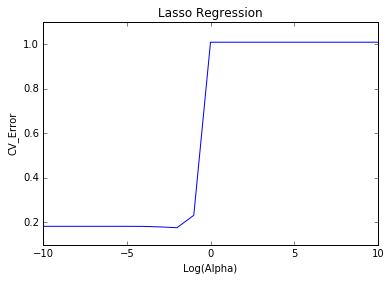

In [20]:
MSE_Lasso_CV = []
alphas = np.logspace(-10, 10, 21)
alphas_index = np.linspace(-10, 10, 21)

CV_Scores = []

for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    CV_Scores.append(- cross_val_score(lm, X1, y11, cv=10, 
                     scoring = 'mean_squared_error').mean())



print(zip(alphas, CV_Scores))

plt.plot(alphas_index, CV_Scores)
plt.xlabel("Log(Alpha)")
plt.ylabel("CV_Error")
plt.title("Lasso Regression")
plt.show()

In [21]:
lm = linear_model.Lasso(alpha=.01)
lm.fit(X1, y11)
print zip(lm.coef_,X1.columns)

[(0.0, 'Unnamed: 0'), (0.0, 'p_parkacc'), (-0.017541764880506825, 'pop2010'), (0.19126351109074971, 'gini_index'), (0.67988980728195281, 'median_hh_income'), (0.097193108215782337, 'athome'), (0.046396261034050618, 'bicycle'), (0.040862299007041726, 'publictr'), (0.076004749079251005, 'walk'), (0.0, 'food_afford'), (0.0, 'ave_fam_size'), (0.011502887828917029, 'job_house_tot'), (0.0, 'job_match'), (-0.083954917493076722, 'ozone'), (-0.0, 'pm25_conc'), (-0.028433935430335081, 'p_hs_edatt'), (0.053321045937691283, 'livewage_s'), (-0.05068506577750681, 'poverty_child'), (-0.0, 'poverty_all'), (-0.1022300046042713, 'unemp_rate'), (-0.073130911187571424, 'voted'), (0.0050247354711218826, 'bad_water'), (0.00024767821194728138, 'traf_sev'), (0.0, 'alc_off'), (0.093878577400965266, 'alc_on'), (0.18140024340976968, 'alc_tot'), (-0.089359153247387038, 'hh_fam')]


In [22]:
lm = linear_model.Lasso(alpha=.01)
lm.fit(X1, y12)
print zip(lm.coef_,X1.columns)

[(0.0, 'Unnamed: 0'), (0.0052109747189405722, 'p_parkacc'), (-0.027734551433367793, 'pop2010'), (0.23406484579685705, 'gini_index'), (0.61793893520269394, 'median_hh_income'), (0.1413249718812154, 'athome'), (-0.0, 'bicycle'), (0.062991939285468895, 'publictr'), (0.058476531625602061, 'walk'), (0.0, 'food_afford'), (0.0, 'ave_fam_size'), (-0.0, 'job_house_tot'), (-0.0, 'job_match'), (-0.10923403568127457, 'ozone'), (-0.019264368647571504, 'pm25_conc'), (-0.15058010699030652, 'p_hs_edatt'), (0.10395964365443401, 'livewage_s'), (-0.0, 'poverty_child'), (-0.14796286336705339, 'poverty_all'), (-0.12331775648871046, 'unemp_rate'), (-0.20849061357192247, 'voted'), (-0.0, 'bad_water'), (0.018966484267712223, 'traf_sev'), (-0.0, 'alc_off'), (0.024880746432051706, 'alc_on'), (0.24341978337872505, 'alc_tot'), (-0.170048690753902, 'hh_fam')]


In [23]:
lm = linear_model.Lasso(alpha=.01)
lm.fit(X2, y21)
print zip(lm.coef_,X1.columns)

[(-0.0, 'Unnamed: 0'), (-0.014479628342082914, 'p_parkacc'), (-0.033238636016588628, 'pop2010'), (0.2385950506481955, 'gini_index'), (0.63627581420755186, 'median_hh_income'), (0.042395311748512805, 'athome'), (-0.0, 'bicycle'), (-0.0, 'publictr'), (0.087691828059022606, 'walk'), (-0.056019095099131028, 'food_afford'), (0.016426089269320265, 'ave_fam_size'), (-0.0, 'job_house_tot'), (0.0, 'job_match'), (0.013719556626246743, 'ozone'), (-0.031248395241973689, 'pm25_conc'), (-0.0, 'p_hs_edatt'), (-0.013063976624572718, 'livewage_s'), (0.0, 'poverty_child'), (-0.0, 'poverty_all'), (-0.01584220561544223, 'unemp_rate'), (-0.045841930044731576, 'voted'), (0.0, 'bad_water'), (-0.095740690615825824, 'traf_sev'), (-0.014774572614221838, 'alc_off'), (-0.038943788630185036, 'alc_on'), (0.0053440195687731815, 'alc_tot'), (0.16731452569752139, 'hh_fam')]


In [24]:
lm = linear_model.Lasso(alpha=.01)
lm.fit(X2, y22)
print zip(lm.coef_,X1.columns)

[(-0.0, 'Unnamed: 0'), (0.011296041988441268, 'p_parkacc'), (-0.053111879644895013, 'pop2010'), (0.3325806090878175, 'gini_index'), (0.5558559019429502, 'median_hh_income'), (0.17464075406227259, 'athome'), (-0.055619596128620739, 'bicycle'), (-0.026865729342802899, 'publictr'), (0.087720918595002098, 'walk'), (-0.0, 'food_afford'), (0.14150991711661529, 'ave_fam_size'), (-0.030411899645779655, 'job_house_tot'), (-0.010341695365665706, 'job_match'), (-0.0, 'ozone'), (-0.08287154255578566, 'pm25_conc'), (-0.0095279013603015109, 'p_hs_edatt'), (-0.10250665146163905, 'livewage_s'), (0.0, 'poverty_child'), (-0.0, 'poverty_all'), (-0.1171297303736729, 'unemp_rate'), (-0.071424267071143355, 'voted'), (-0.018505511125568797, 'bad_water'), (-0.060979654686407113, 'traf_sev'), (0.0, 'alc_off'), (-0.15788647314141671, 'alc_on'), (0.0020142627923135999, 'alc_tot'), (0.16534365945126109, 'hh_fam')]


/Applications/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


[(1e-10, 0.18302337697667254), (1.0000000000000001e-09, 0.1830233721668065), (1e-08, 0.18302332405099889), (9.9999999999999995e-08, 0.18302284287317555), (9.9999999999999995e-07, 0.18301803242064638), (1.0000000000000001e-05, 0.18297003032615455), (0.0001, 0.18250089641749137), (0.001, 0.17936468943297795), (0.01, 0.16996743304890144), (0.10000000000000001, 0.20929792273085748), (1.0, 1.0113190925137905), (10.0, 1.0113190925137905), (100.0, 1.0113190925137905), (1000.0, 1.0113190925137905), (10000.0, 1.0113190925137905), (100000.0, 1.0113190925137905), (1000000.0, 1.0113190925137905), (10000000.0, 1.0113190925137905), (100000000.0, 1.0113190925137905), (1000000000.0, 1.0113190925137905), (10000000000.0, 1.0113190925137905)]


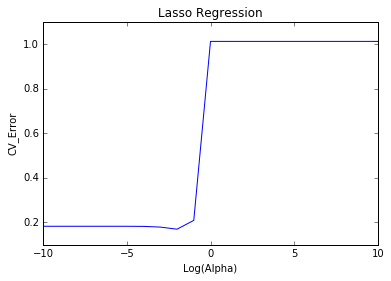

In [25]:
MSE_Lasso_CV = []
alphas = np.logspace(-10, 10, 21)
alphas_index = np.linspace(-10, 10, 21)

CV_Scores = []

for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    CV_Scores.append(- cross_val_score(lm, X2, y21, cv=10, 
                     scoring = 'mean_squared_error').mean())



print(zip(alphas, CV_Scores))

plt.plot(alphas_index, CV_Scores)
plt.xlabel("Log(Alpha)")
plt.ylabel("CV_Error")
plt.title("Lasso Regression")
plt.show()

In [103]:
#Count number of missing columns in a given row. If a row is missing lots of vars, probably doesn't have enough data 
#to fill in missings. Cutoff?
cahouse['missing_vars'] = cahouse.isnull().sum(axis=1)
print cahouse.missing_vars.describe()
#print cahouse.missing_vars[cahouse.missing_vars > 10].count()
ca_fillmiss = cahouse[cahouse.missing_vars <= 8]
ca_zill_labels = ca_fillmiss[['placename', 'county', 'regionid',  'placefp', 'geoname', 'zri_sqft', 'hval_sqft']]
ca_fillmiss = ca_fillmiss.drop(['hfood_acc', 'day_care', 'violent_crime', 'child_abuse', 'p_trans_acc', 'placename', 
                                'county', 'regionid', 'zri_sqft', 'hval_sqft', 'missing_vars', 'placefp', 'geoname',
                               'Unnamed: 0'], axis=1)
print ca_fillmiss.shape[0]
print ca_fillmiss.shape[1]
print ca_fillmiss.count()

count    750.000000
mean       2.826667
std        4.277970
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       28.000000
Name: missing_vars, dtype: float64
710
26
p_parkacc           710
pop2010             710
gini_index          710
median_hh_income    709
athome              710
bicycle             710
publictr            710
walk                710
food_afford         667
ave_fam_size        708
job_house_tot       704
job_match           704
ozone               689
pm25_conc           691
p_hs_edatt          710
livewage_s          675
poverty_child       710
poverty_all         710
unemp_rate          710
voted               710
bad_water           665
traf_sev            692
alc_off             704
alc_on              694
alc_tot             707
hh_fam              710
dtype: int64


In [104]:
#create df of only vars with complete data. use this to fit regressions to fill in missing
ca_complete = ca_fillmiss.dropna(axis=1, how='any')

#define function that takes in var name, and fills in missing values of that var using linear regression with error, limiting to min/max
def fillinmiss(miss_var):
    to_fill = ca_fillmiss[miss_var]
    combined = pd.concat([ca_complete, to_fill], axis=1)
    ca_nomiss = combined.dropna(how = 'any', subset = [miss_var], inplace = False).copy()

    linreg = LinearRegression()
    X = ca_nomiss.drop([miss_var], axis=1)
    y = ca_nomiss[miss_var]
    linreg.fit(X, y)

    y_min = y.min()
    y_max = y.max()
    y_hat = linreg.predict(X)
    Standard_error = ( sum( (y - y_hat) ** 2 )/(len(y) - 2) ) ** .5
    combined['oz_pred'] = linreg.predict(ca_complete) + np.random.normal(0, Standard_error, len(combined))
    ca_fillmiss[miss_var].fillna(value = combined['oz_pred'], inplace = True)
    ca_fillmiss.loc[(ca_fillmiss[miss_var] < y_min), miss_var] = y_min 
    ca_fillmiss.loc[(ca_fillmiss[miss_var] > y_max), miss_var] = y_max

for i in ca_fillmiss.columns[ca_fillmiss.isnull().any()]:
    fillinmiss(i)
    
ca_filled = pd.concat([ca_fillmiss, ca_zill_labels], axis=1)
print ca_filled.count()

p_parkacc           710
pop2010             710
gini_index          710
median_hh_income    710
athome              710
bicycle             710
publictr            710
walk                710
food_afford         710
ave_fam_size        710
job_house_tot       710
job_match           710
ozone               710
pm25_conc           710
p_hs_edatt          710
livewage_s          710
poverty_child       710
poverty_all         710
unemp_rate          710
voted               710
bad_water           710
traf_sev            710
alc_off             710
alc_on              710
alc_tot             710
hh_fam              710
placename           710
county              710
regionid            710
placefp             710
geoname             710
zri_sqft            669
hval_sqft           668
dtype: int64


In [105]:
#SAVE FINAL BUILD
ca_filled.to_csv('ca_house_missing_filled.txt', encoding='utf-8')


In [85]:
ca_complete = ca_fillmiss.dropna(axis=1, how='any')
#print ca_complete.count()
to_fill = ca_fillmiss['ozone']
combined = pd.concat([ca_complete, to_fill], axis=1)
print combined.count()
ca_nomiss = combined.dropna(how = 'any', subset = ['ozone'], inplace = False).copy()
print ca_nomiss.count()

linreg = LinearRegression()
X = ca_nomiss.drop(['ozone'], axis=1)
y = ca_nomiss['ozone']
linreg.fit(X, y)

#combined['oz_pred'] = linreg.predict(ca_complete)
#ca_fillmiss['ozone'].fillna(value = combined['oz_pred'], inplace = True)
#print ca_fillmiss.count()

y_min = y.min()
y_max = y.max()
y_hat = linreg.predict(X)
Standard_error = ( sum( (y - y_hat) ** 2 )/(len(y) - 2) ) ** .5
combined['oz_pred'] = linreg.predict(ca_complete) + np.random.normal(0, Standard_error, len(combined))
ca_fillmiss['ozone'].fillna(value = combined['oz_pred'], inplace = True)
ca_fillmiss.loc[(ca_fillmiss['ozone'] < y_min), 'ozone'] = y_min 
ca_fillmiss.loc[(ca_fillmiss['ozone'] > y_max), 'ozone'] = y_max
print ca_fillmiss.count()

p_parkacc        710
pop2010          710
gini_index       710
athome           710
bicycle          710
publictr         710
walk             710
p_hs_edatt       710
poverty_child    710
poverty_all      710
unemp_rate       710
voted            710
hh_fam           710
ozone            689
dtype: int64
p_parkacc        689
pop2010          689
gini_index       689
athome           689
bicycle          689
publictr         689
walk             689
p_hs_edatt       689
poverty_child    689
poverty_all      689
unemp_rate       689
voted            689
hh_fam           689
ozone            689
dtype: int64
p_parkacc           710
pop2010             710
gini_index          710
median_hh_income    709
athome              710
bicycle             710
publictr            710
walk                710
food_afford         667
ave_fam_size        708
job_house_tot       704
job_match           704
ozone               710
pm25_conc           691
p_hs_edatt          710
livewage_s          675
po

In [45]:
ca_NoMissing = ca_fillmiss.dropna(how = 'any', inplace = False).copy()
ca_NoMissing.shape[0]
ca_NoMissing.count()

p_parkacc           562
pop2010             562
gini_index          562
median_hh_income    562
athome              562
bicycle             562
publictr            562
walk                562
food_afford         562
ave_fam_size        562
job_house_tot       562
job_match           562
ozone               562
pm25_conc           562
p_hs_edatt          562
livewage_s          562
poverty_child       562
poverty_all         562
unemp_rate          562
voted               562
bad_water           562
traf_sev            562
alc_off             562
alc_on              562
alc_tot             562
hh_fam              562
dtype: int64

In [11]:
cahouse.corr()

,Unnamed: 0,placefp,p_parkacc,pop2010,gini_index,median_hh_income,athome,bicycle,car,carpool,...,hh_m,hh_m_child,hh_married,hh_married_child,hh_nonfam,hh_nonfam_solo,regionid,zri_sqft,hval_sqft,missing_vars
Unnamed: 0,1.000000,0.998235,0.027861,0.041219,0.009204,0.014908,0.008361,-0.004414,-0.009553,0.006243,...,0.028992,0.040548,-0.033110,-0.007761,0.021609,0.017347,0.014610,-0.007239,-0.004748,-0.043911
placefp,0.998235,1.000000,0.026512,0.039955,0.006133,0.012442,0.008256,-0.007303,-0.007347,0.007250,...,0.031307,0.041562,-0.033129,-0.007018,0.019602,0.015936,0.016593,-0.010418,-0.008103,-0.037110
p_parkacc,0.027861,0.026512,1.000000,0.085553,0.052540,0.118013,-0.109039,0.118209,0.011795,-0.087386,...,-0.012677,-0.059579,-0.122668,-0.006593,0.140598,0.111216,-0.060030,0.256407,0.246340,-0.146508
pop2010,0.041219,0.039955,0.085553,1.000000,0.094129,-0.020008,-0.061863,0.017392,-0.043733,-0.008580,...,0.035170,0.002101,-0.084967,0.000353,0.044100,0.024538,-0.031906,0.048438,0.018001,-0.149247
gini_index,0.009204,0.006133,0.052540,0.094129,1.000000,0.213701,0.402586,0.248654,-0.129020,-0.286114,...,-0.240575,-0.180588,-0.189548,-0.324985,0.390488,0.398547,-0.054312,0.402153,0.413811,-0.207935
median_hh_income,0.014908,0.012442,0.118013,-0.020008,0.213701,1.000000,0.418430,-0.022647,0.209825,-0.456151,...,-0.380195,-0.307931,0.531270,0.192092,-0.138862,-0.156219,0.038417,0.588206,0.694610,-0.157215
athome,0.008361,0.008256,-0.109039,-0.061863,0.402586,0.418430,1.000000,0.046360,-0.166755,-0.419229,...,-0.360131,-0.283970,0.062733,-0.285560,0.268519,0.268217,0.044673,0.391223,0.462366,0.182163
bicycle,-0.004414,-0.007303,0.118209,0.017392,0.248654,-0.022647,0.046360,1.000000,-0.379826,-0.111326,...,-0.110983,-0.090610,-0.262097,-0.195676,0.333910,0.246513,-0.049526,0.194370,0.243837,-0.092488
car,-0.009553,-0.007347,0.011795,-0.043733,-0.129020,0.209825,-0.166755,-0.379826,1.000000,-0.502832,...,-0.160499,-0.114854,0.255302,0.050996,-0.140813,-0.109987,0.068396,-0.116331,-0.096537,-0.019708
carpool,0.006243,0.007250,-0.087386,-0.008580,-0.286114,-0.456151,-0.419229,-0.111326,-0.502832,1.000000,...,0.412731,0.345642,-0.014697,0.308538,-0.307315,-0.296462,-0.065409,-0.380884,-0.463336,0.029709


In [60]:
print ca_fillmiss.count()

Unnamed: 0          694
placefp             694
geoname             694
p_parkacc           694
pop2010             694
gini_index          694
median_hh_income    693
athome              694
bicycle             694
car                 694
carpool             694
cartotal            694
publictr            694
walk                694
median_income       664
food_afford         664
ave_fam_size        694
hfood_acc           507
job_house_low       683
job_house_tot       688
job_match           688
ozone               674
pm25_conc           676
p_hs_edatt          694
livewage_s          667
livewage_m          657
poverty_child       694
poverty_conc        543
poverty_all         694
unemp_rate          694
day_care            532
inf_care            351
violent_crime       440
child_abuse         504
voted               694
bad_water           654
p_trans_acc         448
traf_fatal          587
traf_sev            678
alc_off             688
alc_on              681
alc_tot         

In [68]:
ca_drop = ca_fillmiss.dropna(subset = ['hfood_acc'])
ca_drop = ca_drop.drop(['missing_vars', 'missing_zill'], axis = 1)

In [74]:
AllVariables = ca_drop.columns.values
X = ca_drop[AllVariables]
X = ca_drop.drop(['placefp', 'geoname', 'placename', 'county', 'regionid', 'zri_sqft', 'hval_sqft', 'violent_crime'], axis = 1)
X = ca_drop[['livewage_m', 'unemp_rate', 'p_hs_edatt']]
y = ca_drop['violent_crime']
lm1 = smf.ols(formula = 'y ~ X', data = ca_drop).fit()
print(lm1.pvalues)

Intercept    3.565472e-02
X[0]         5.350152e-10
X[1]         2.266973e-02
X[2]         9.056307e-05
dtype: float64
